# Linear regression, model complexity and regularization


In [3]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=50, n_features=1, n_informative=1, noise=50, random_state=1)

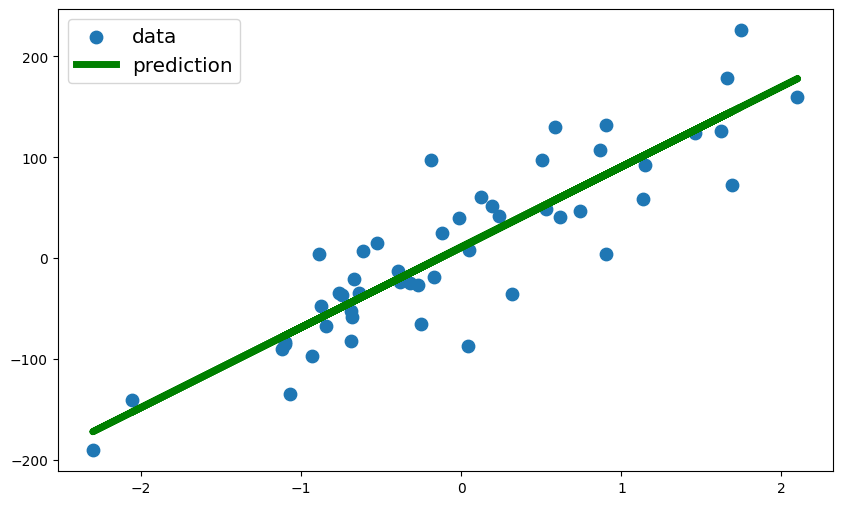

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(X, y, s=80, label='data')

lr = LinearRegression().fit(X, y)

plt.plot(X, lr.predict(X), label='prediction', c='g', linewidth=5)
plt.legend(fontsize="x-large")

## Feature exapnasion

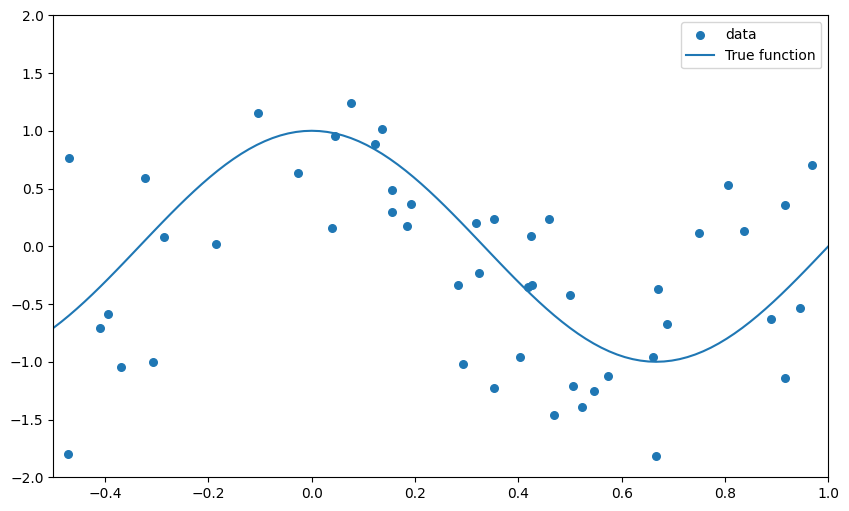

In [7]:
import numpy as np


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 50
degrees = [1, 4, 15]

X = np.sort(np.random.uniform(-.5, 1, n_samples))
y = true_fun(X) + np.random.normal(0, .7, n_samples)

plt.figure(figsize=(10, 6))


X_test = np.linspace(-.5, 1, 100)

plt.scatter(X, y, s=30, label='data')
plt.plot(X_test, true_fun(X_test), label="True function")

plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

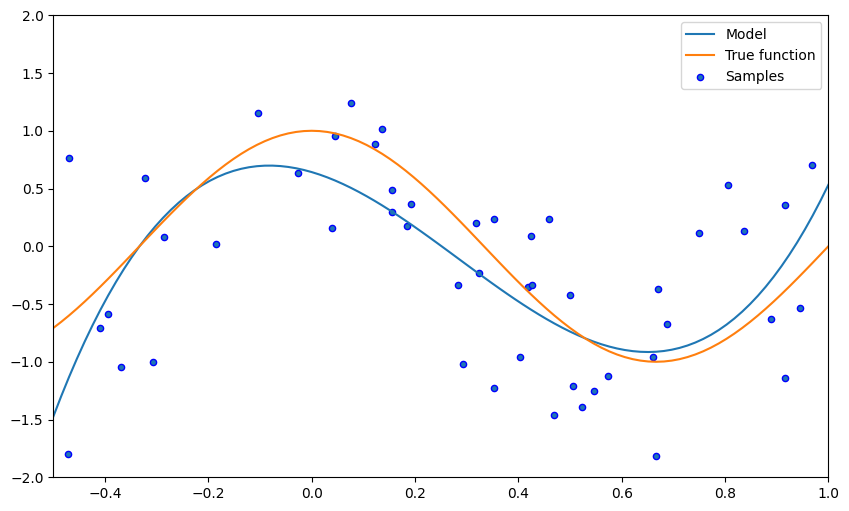

In [9]:
from sklearn.preprocessing import PolynomialFeatures

X = X.reshape(-1, 1)

polynomial_features = PolynomialFeatures(degree=3, include_bias=True)
X_expanded = polynomial_features.fit_transform(X)

model = LinearRegression().fit(X_expanded, y)
y_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))


plt.figure(figsize=(10, 6))

plt.plot(X_test, y_pred, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")

plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

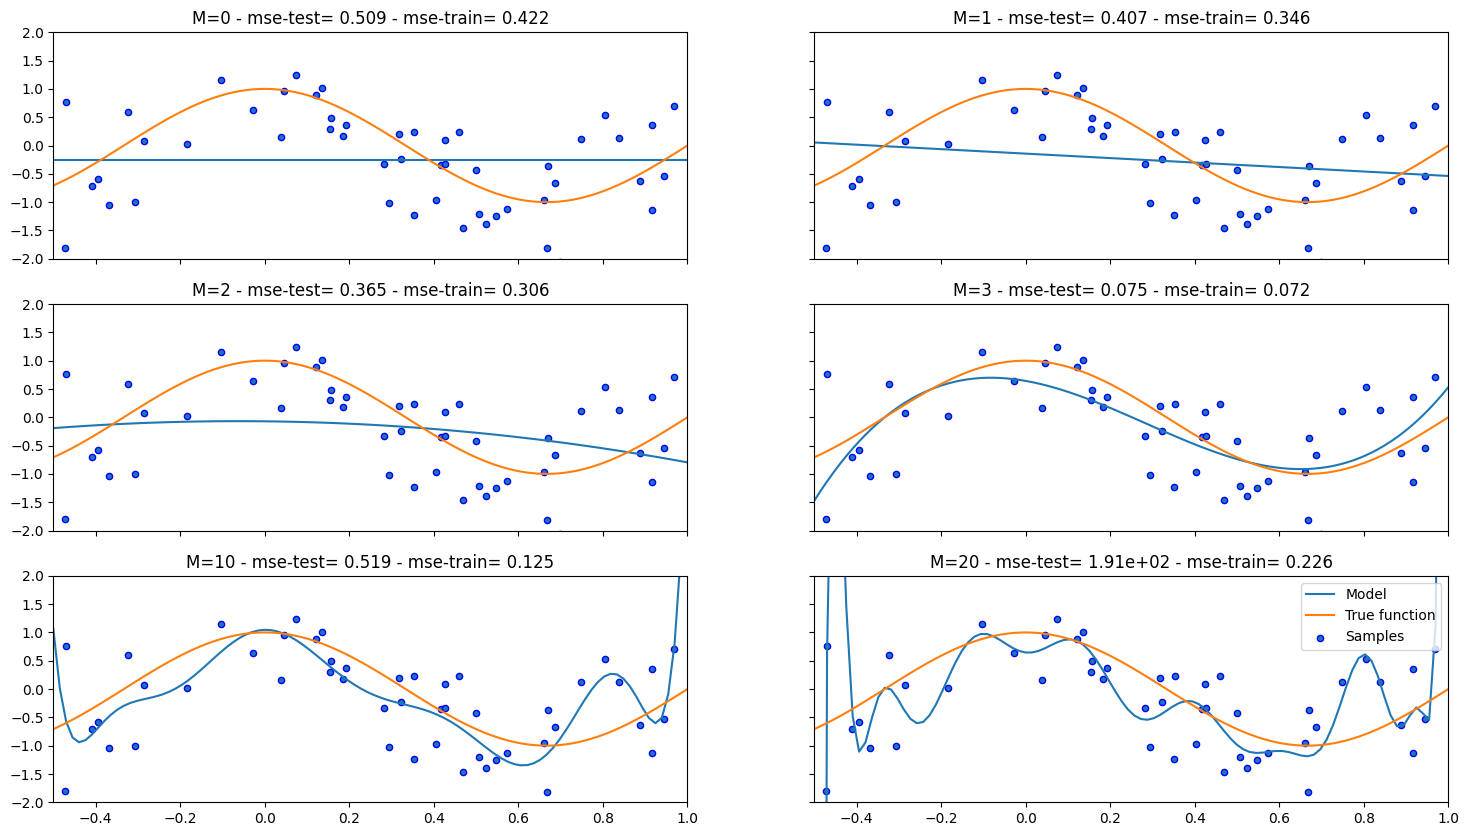

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

X = X.reshape(-1, 1)

_, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 10))

model_coeficients = {}
mse_trains = []
mse_tests = []

for i, d in enumerate([0, 1, 2, 3, 10, 20]):
    ax = axes[i//2, i%2]
    polynomial_features = PolynomialFeatures(degree=d, include_bias=True)
    X_expanded = polynomial_features.fit_transform(X)

    model = LinearRegression().fit(X_expanded, y)

    y_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))

    mse_test = mean_squared_error(true_fun(X_test), y_pred)
    mse_train = mean_squared_error(true_fun(X), model.predict(X_expanded))
    
    model_coeficients[f"M={d}"] = model.coef_ 
    
    mse_trains.append(mse_train)
    mse_tests.append(mse_test)
    
    
    ax.plot(X_test, y_pred, label="Model")
    ax.plot(X_test, true_fun(X_test), label="True function")
    ax.scatter(X, y, edgecolor="b", s=20, label="Samples")
    ax.title.set_text(f"M={d} - mse-test={mse_test: .3} - mse-train={mse_train: .3}")
    

plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

In [11]:
import pandas as pd
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in model_coeficients.items()])).rename(index={i: f"w{i}" for i in range(21)})

,M=0,M=1,M=2,M=3,M=10,M=20
w0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
w1,NaN,-0.394681,-0.081159,-1.314186,0.170300,-8.959045e-01
w2,NaN,NaN,-0.644319,-6.993895,-38.800891,6.154111e+01
w3,NaN,NaN,NaN,8.197457,11.321907,3.895278e+01
w4,NaN,NaN,NaN,NaN,472.721590,-3.991044e+03
w5,NaN,NaN,NaN,NaN,-386.617628,5.686486e+01
w6,NaN,NaN,NaN,NaN,-2574.939666,7.173385e+04
w7,NaN,NaN,NaN,NaN,3441.811529,7.068850e+03
w8,NaN,NaN,NaN,NaN,3988.046817,-6.478542e+05
w9,NaN,NaN,NaN,NaN,-8850.837064,-4.311545e+05


## 💀 Execise 

1. Plot the error function with ragard to model complexity.
2. Repeat the above experiment with Lasso and Ridge
3. Look at the coeficients and see the difference 
4. Play with the `alpha` param and see it effect

## Regression with regularization


In [12]:
from numpy import genfromtxt
from sklearn.model_selection import train_test_split

dataset = genfromtxt("data/housing.csv", delimiter=',')

X = dataset[:, :-1]
y = dataset[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### No regularization

In [13]:
lr = LinearRegression().fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.61


### Ridge

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.90
Ridge Regression-Test set score: 0.76


### Lasso

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01, max_iter=10000).fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.90
Lasso Regression-Test set score: 0.77


In [18]:
print(f"Number of features: {sum(lasso.coef_ != 0)}")

Number of features: 33


### Elastic-Net

In [19]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01, max_iter=10000).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.84
Elastic Net-Test set score: 0.70
